## Bài 1.a

C:\Users\Admin\AppData\Local\Temp\ipykernel_5148\4258546308.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


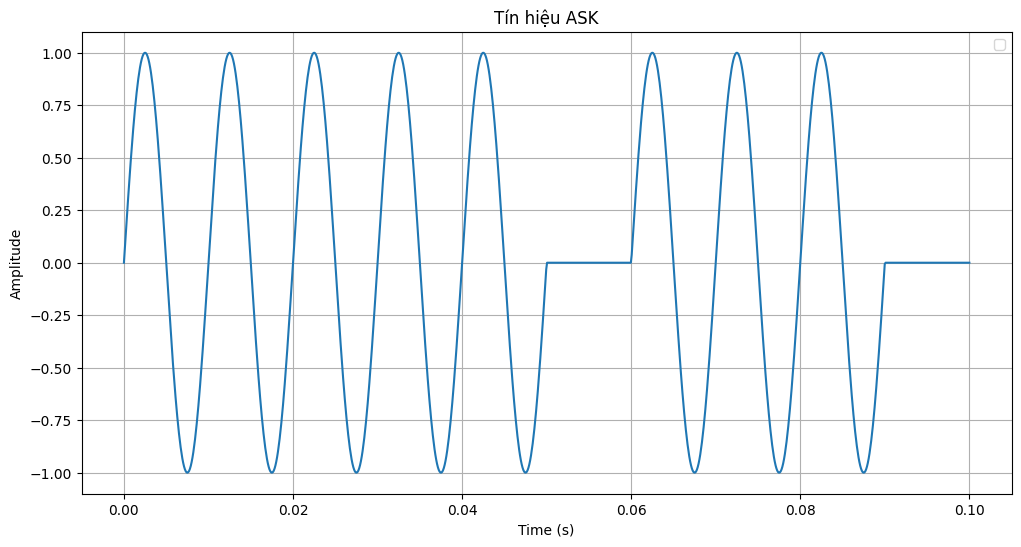

C:\Users\Admin\AppData\Local\Temp\ipykernel_5148\4258546308.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


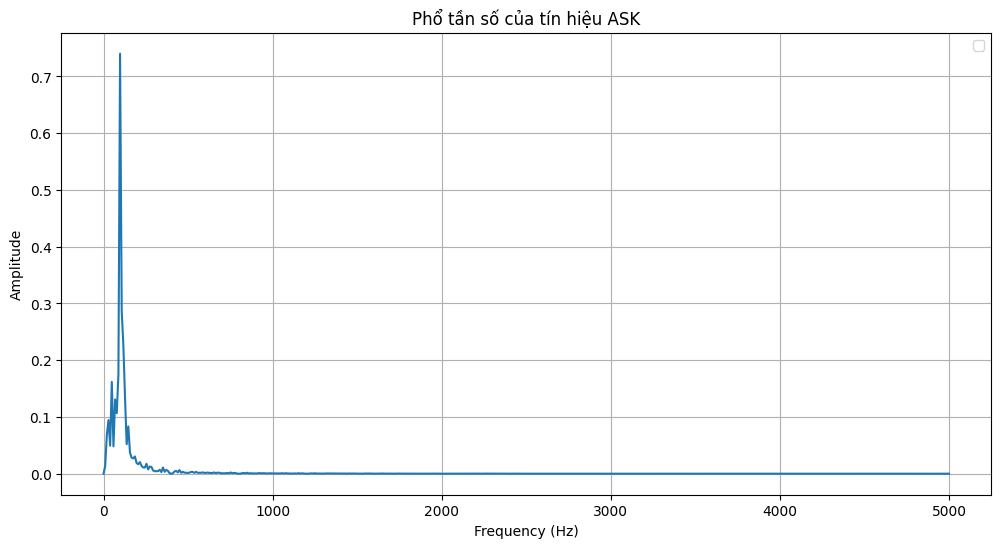

In [114]:
import numpy as np
import matplotlib.pyplot as plt


A = 1 
f_ask = 100 
w0 = 0 
bit_rate = 100  
T_bit = 1 / bit_rate
num_bits = 10
time_per_bit = 100
Fs = 10000  ## Số lần tính giá trị của sóng mỗi giây, số lần lấy mẫu mỗi giây

bits = np.random.randint(0, 2, num_bits)
t = np.linspace(0, num_bits * T_bit, len(bits) * time_per_bit)
ask_signal = np.zeros(len(t))

for i, bit in enumerate(bits): ## Tính sóng ask
    start = i * time_per_bit
    end = (i + 1) * time_per_bit
    n_t = bit  
    ask_signal[start:end] = A * n_t * np.sin(2 * np.pi * f_ask * t[start:end] + w0)

plt.figure(figsize=(12, 6))
plt.plot(t, ask_signal)
plt.title("Tín hiệu ASK")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()


NFFT = 2**int(np.ceil(np.log2(len(ask_signal))))  
S = np.fft.fft(ask_signal, NFFT) / len(ask_signal) 
frequencies = Fs / 2 * np.linspace(0, 1, NFFT // 2 + 1) 
amplitude_spectrum = 2 * np.abs(S[:NFFT // 2 + 1]) 

plt.figure(figsize=(12, 6))
plt.plot(frequencies, amplitude_spectrum)
plt.title("Phổ tần số của tín hiệu ASK")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Bài 1.b

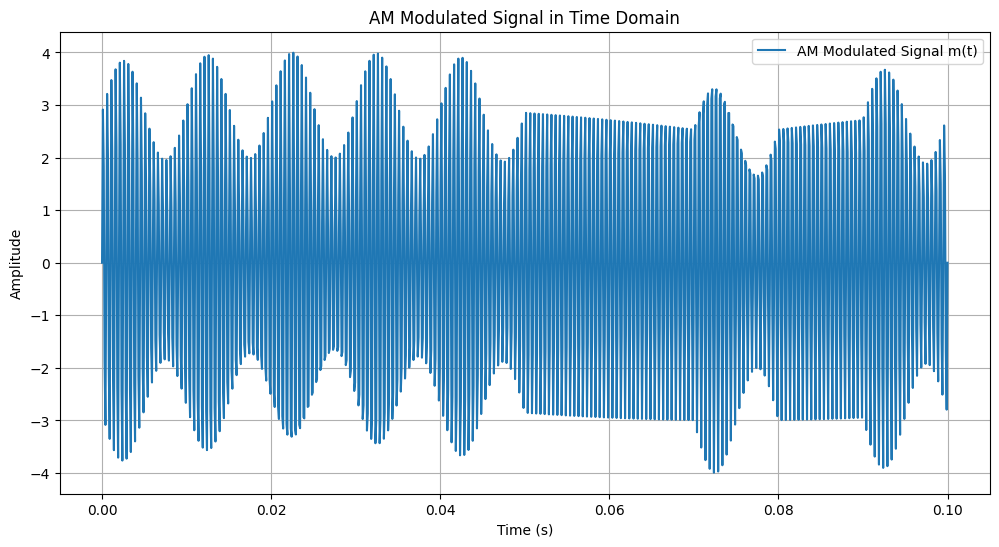

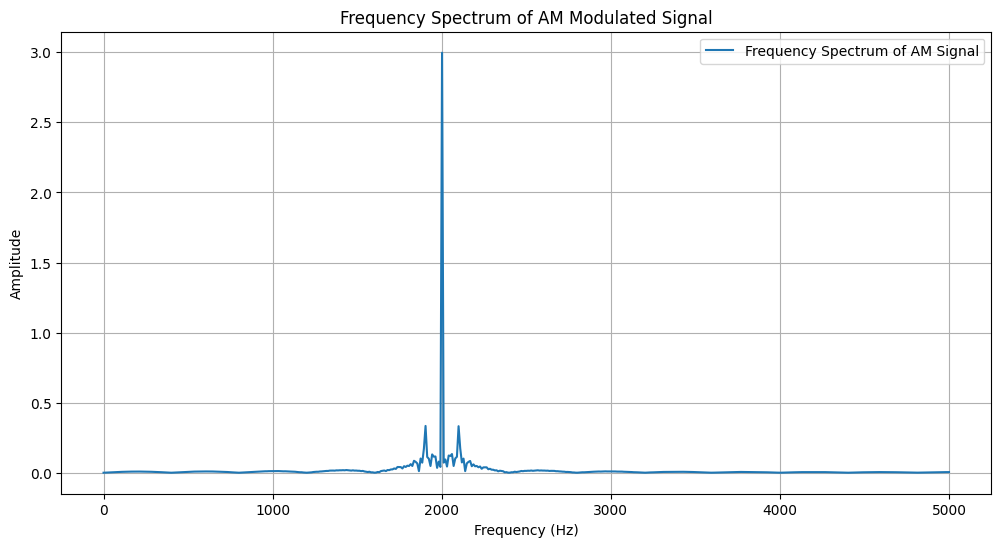

In [57]:
C = 3
fc = 2000

m_t = (C + ask_signal) * np.sin(2 * np.pi * fc * t + w0)

# Biểu diễn tín hiệu AM trong miền thời gian
plt.figure(figsize=(12, 6))
plt.plot(t, m_t, label='AM Modulated Signal m(t)')
plt.title('AM Modulated Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

# Phân tích phổ tần số của tín hiệu AM
NFFT = 2**int(np.ceil(np.log2(len(m_t)))) 
M = np.fft.fft(m_t, NFFT) / len(m_t) 
frequencies = Fs / 2 * np.linspace(0, 1, NFFT // 2 + 1)  
amplitude_spectrum = 2 * np.abs(M[:NFFT // 2 + 1]) 

# Biểu diễn phổ tần số
plt.figure(figsize=(12, 6))
plt.plot(frequencies, amplitude_spectrum, label='Frequency Spectrum of AM Signal')
plt.title('Frequency Spectrum of AM Modulated Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()


## Bài 1.c

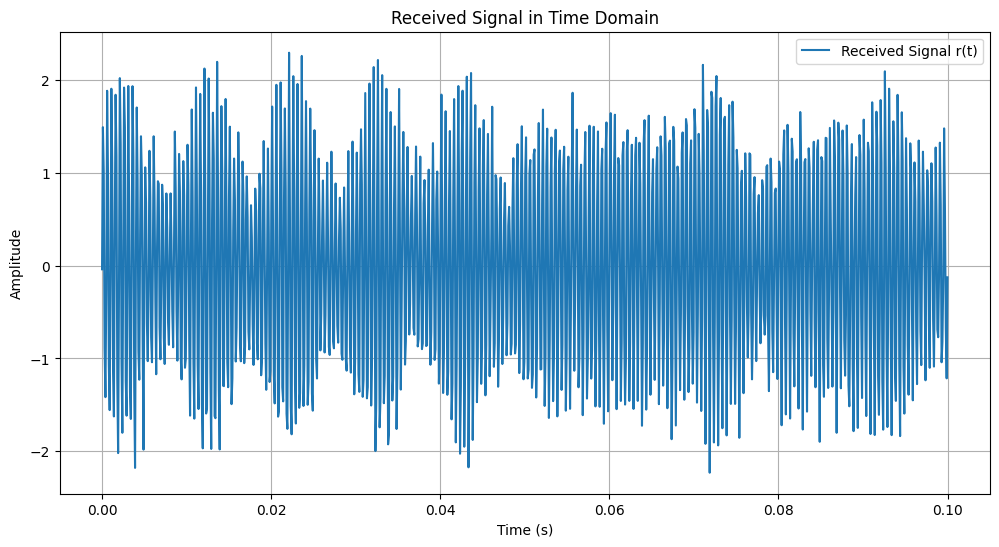

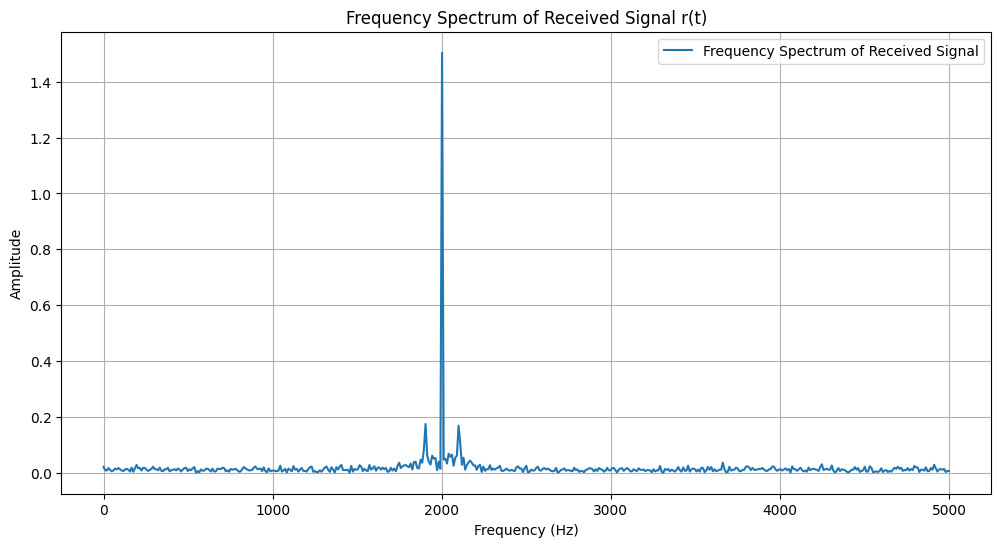

In [68]:
import numpy as np
import matplotlib.pyplot as plt


l_o = 0.5

An= 0.2

Nt = An * np.random.randn(len(m_t))

recieved_signal = l_o * (m_t) + Nt

# Biểu diễn theo thời gian
plt.figure(figsize=(12, 6))
plt.plot(t, recieved_signal, label='Received Signal r(t)')
plt.title('Received Signal in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

# Phân tích phổ tần số của tín hiệu nhận
NFFT = 2**int(np.ceil(np.log2(len(recieved_signal))))  # Số điểm FFT
R = np.fft.fft(recieved_signal, NFFT) / len(recieved_signal)  # FFT tín hiệu và chuẩn hóa
frequencies = Fs / 2 * np.linspace(0, 1, NFFT // 2 + 1)  # Trục tần số
amplitude_spectrum = 2 * np.abs(R[:NFFT // 2 + 1])  # Phổ biên độ

# Biểu diễn phổ tần số
plt.figure(figsize=(12, 6))
plt.plot(frequencies, amplitude_spectrum, label='Frequency Spectrum of Received Signal')
plt.title('Frequency Spectrum of Received Signal r(t)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()


# Bài 1.d

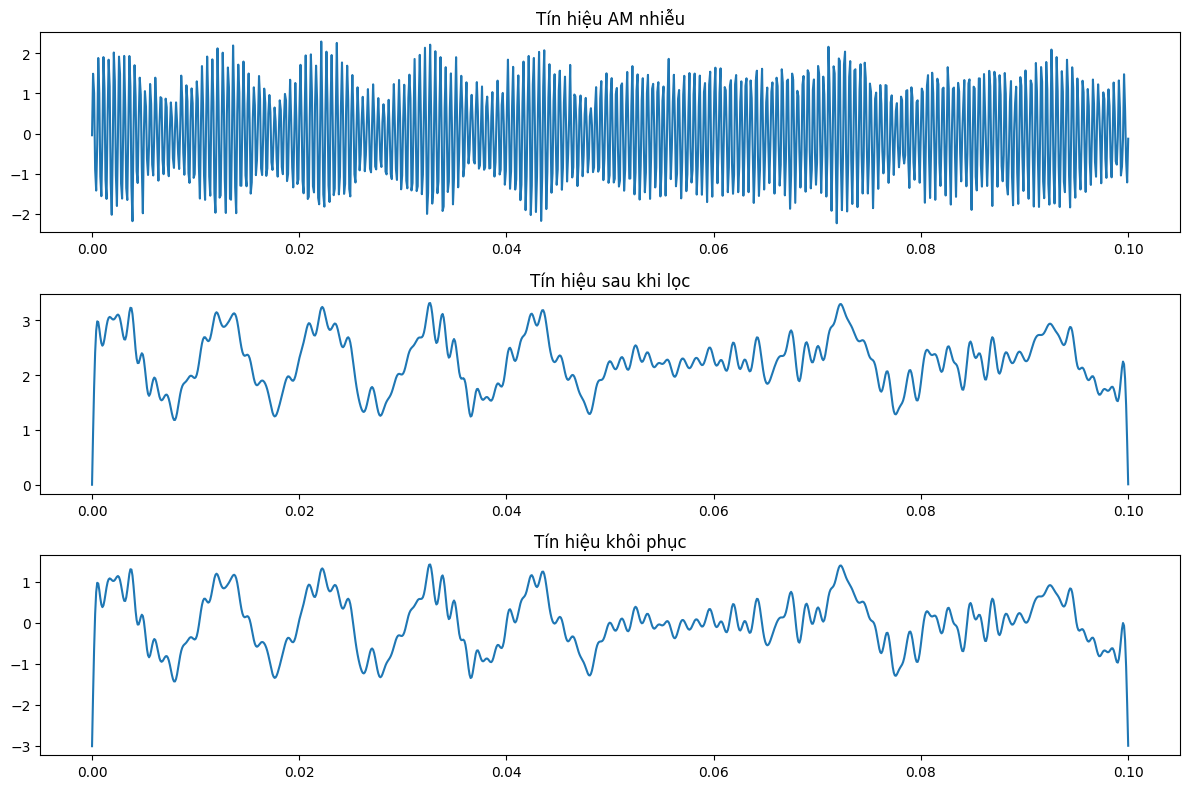

In [ ]:
from scipy import signal
from scipy.fft import fft, fftfreq

receive_signal = recieved_signal * C * np.sin(2 * np.pi * fc * t)

cutoff = fc
fs = 10000
nyq =  fs
normal_cutoff = cutoff / nyq
order = 10
b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

# Lọc tín hiệu
filtered_signal = signal.filtfilt(b, a, receive_signal)
origin_signal = (2 * filtered_signal / 0.5 - C*C) / C

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, recieved_signal)
plt.title('Tín hiệu AM nhiễu')
plt.subplot(3, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Tín hiệu sau khi lọc')
plt.subplot(3, 1, 3)
plt.plot(t, origin_signal)
plt.title('Tín hiệu khôi phục')
plt.tight_layout()

### So sánh tín hiệu ban đầu và tín hiệu khôi phục được

In [70]:
# Tính mức năng lượng -> check ngưỡng năng lương -> bit
import numpy as np

bit_rate = 100  
Fs = 10000  

time_per_bit = 100

recovered_bits = []

for i in range(len(bits)):
    start = i * time_per_bit
    end = (i + 1) * time_per_bit
    bit_signal = origin_signal[start:end]
    energy = np.trapz(np.abs(bit_signal), t[start:end])
    threshold = 0.005
    recovered_bits.append(1 if energy > threshold else 0)

print("Tín hiệu ban đầu:            ", bits)
print("Tín hiệu khôi phục:  ", recovered_bits)


Tín hiệu ban đầu:             [1 1 1 1 1 0 0 1 0 1]
Tín hiệu khôi phục:   [1, 1, 1, 1, 1, 0, 0, 1, 0, 1]


### Tỉ lệ bit lỗi so với tín hiệu gốc

In [86]:
errors = np.sum(bits != np.array(recovered_bits))
BER = errors / len(bits)
print("Số bit bị lỗi: ", errors)
print("Tỷ lệ bit lỗi là:", BER)

Số bit bị lỗi:  0
Tỷ lệ bit lỗi là: 0.0


# Bài 1.e

[inf, 20.532972701476115, 14.60510380824572, 10.720976596437907, 8.369694446418695, 6.198976465290774, 4.639190497556963, 3.27400431082021, 2.5911658694243886, 0.977665653720864, 0.4010056413018375, -0.6784026244269006, -1.3174589970843456, -1.9646156480016406, -2.7683412792056163, -3.6212230445677434, -4.054202715801139, -4.673952483837595, -4.865026462677297, -5.344309298106853]


C:\Users\Admin\AppData\Local\Temp\ipykernel_5148\1501534616.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  snr_linear = signal_power / noise_power


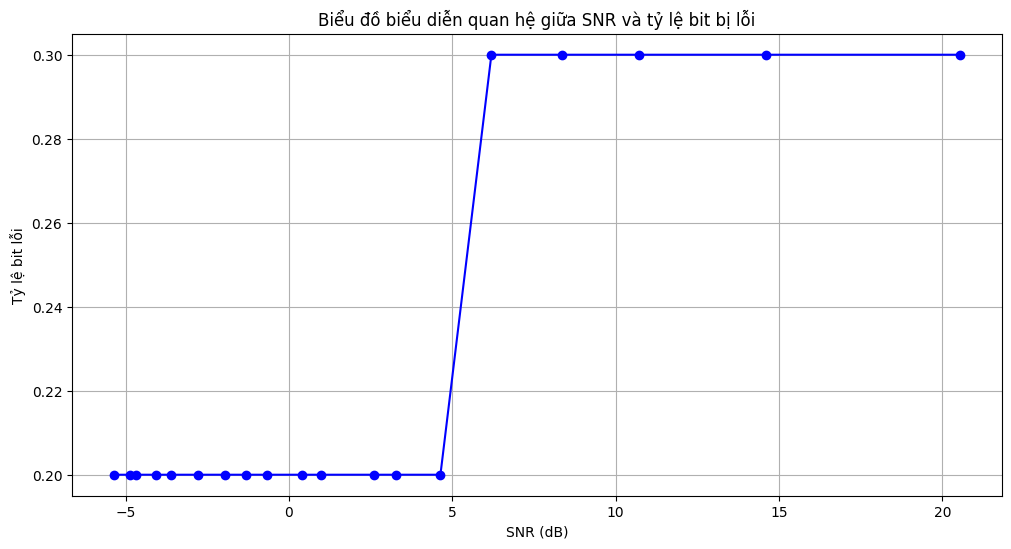

In [115]:
snr_values_db = []
def simulate_noise_effect(noise_levels):
    bit_error_rates = []
    for An in noise_levels:
        noise = An * np.random.randn(len(m_t))
        r_t = l_o * m_t + noise
        x_t = r_t * C * np.sin(2 * np.pi * fc * t)
        filtered_signal = signal.filtfilt(b, a, x_t)
        recovered_signal = (2 * filtered_signal /l_o - C*C) / C
        signal_power = np.mean((l_o * m_t) ** 2)  
        noise_power = np.mean(noise** 2)  
        snr_linear = signal_power / noise_power
        snr_db = 10 * np.log10(snr_linear)
        snr_values_db.append(snr_db)
        recovered_bits = []
        
        
        for i in range(len(bits)):
            start = i * time_per_bit
            end = (i + 1) * time_per_bit
            bit_signal = recovered_signal[start:end]
            energy = np.trapz(np.abs(bit_signal), t[start:end])
            threshold = 0.005
            recovered_bits.append(1 if energy > threshold else 0)

        bit_errors =  np.sum(bits != np.array(recovered_bits))
        bit_error_rate = bit_errors / len(bits)
        bit_error_rates.append(bit_error_rate)

    return bit_error_rates

noise_levels = np.linspace(0, 2, 20)
bit_error_rates = simulate_noise_effect(noise_levels)
print(snr_values_db)
plt.figure(figsize=(12, 6))
plt.plot(snr_values_db, bit_error_rates, 'bo-')
plt.title('Biểu đồ biểu diễn quan hệ giữa SNR và tỷ lệ bit bị lỗi')
plt.xlabel('SNR (dB)')
plt.ylabel('Tỷ lệ bit lỗi')
plt.grid(True)
plt.show()